# **Statistics, Linear, and Logistic Regression Code**

# Libraries

In [0]:
# Import Numpy, Pandas, Matplotlib, and Sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.gridspec import GridSpec
import sklearn

# Sklearn performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Datasets, preprocessing, partition, training
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Modeling
from sklearn import linear_model
from sklearn.pipeline import Pipeline

# Statistics



1.   Create synthetic datasets
2.   Visualize the distributions using a histogram plot
3.   Calculate the central tendencies of the data
4.   Calculate the variability of the data



## Generate Dataset

First let's declare a simple dataset so we can use for simple examples.

$$X = \{x_1,\ x_2,\ x_3,\ x_4,\ x_5\} = \{1,\ 2,\ 3,\ 4,\ 5\}$$

In [0]:
x = [1, 2, 3, 4, 5]

**Normal Probability Density Function:**
$$f(x)\ = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Let's also create some normalized datasets so we can summarize their results as well.

In [0]:
# Normal probability distribution
def generate_dataset(mu, sigma):
  data = mu + sigma * np.random.randn(10000)
  return data

In [0]:
# pdf with mean 0 and std of 15
mean1 = 0
sig1 = 15
pdf1 = generate_dataset(mean1, sig1)

# pdf with mean 120 and std of 30
mean2 = 120
sig2 = 30
pdf2 = generate_dataset(mean2, sig2)

# pdf with mean 50 and std of 5
mean3 = 50
sig3 = 5
pdf3 = generate_dataset(mean3, sig3)

Now let's create three histrograms our normalized datasets along with their ideal pdf lines:

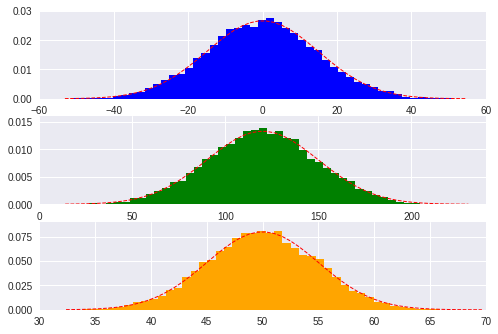

In [6]:
# Initialize our matplotlib plots
fig, axes = plt.subplots(nrows=3)

# PDF plot of mean 1 and std of 15
n1, bins1, patches1 = axes[0].hist(pdf1, 50, normed=1, facecolor='blue')
y1 = mlab.normpdf(bins1, mean1, sig1)
l1 = axes[0].plot(bins1, y1, 'r--', linewidth=1)
axes[0].axis([-60, 60, 0, 0.03])

# PDF plot of mean 120 and std of 30
n2, bins2, patches2 = axes[1].hist(pdf2, 50, normed=1, facecolor='green')
y2 = mlab.normpdf(bins2, mean2, sig2)
l2 = axes[1].plot(bins2, y2, 'r--', linewidth=1)
axes[1].axis([0, 240, 0, 0.016])

# PDF plot of mean 50 and std of 5
n3, bins3, patches3 = axes[2].hist(pdf3, 50, normed=1, facecolor='orange')
y3 = mlab.normpdf(bins3, mean3, sig3)
l3 = axes[2].plot(bins3, y3, 'r--', linewidth=1)
axes[2].axis([30, 70, 0, 0.09])

# Display all three histograms
plt.show()

Now that we have our datasets let's calculate their central tendencies.

## Central Tendency

**Mean:**

$$\bar{x} = \frac{\sum_{i=1}^{N}{x_i}}{N} = \frac{x_1 + x_2 + x_3 + ... + x_N}{N}$$

**Example**
$$\bar{x} = \frac{1 + 2 + 3 + 4 + 5}{5} = 3$$

In [0]:
# Create our own custom mean function
def mean(data):
  # Add up all our values from our data
  total = sum(data)
  # Divide our total from the size of the data
  return (1.0*total)/len(data)

In [8]:
# Test mean function on sample data
print(mean(x))

3.0


Now let's use numpy's interal mean procedure.

In [9]:
# Use numpy's internal mean method on all three pdfs 
print(np.mean(pdf1))
print(np.mean(pdf2))
print(np.mean(pdf3))

-0.11155474709537926
119.90506478806988
49.95697132061036


**Median:**

In [0]:
# Create our own custome median function
def median(data):
  size = len(data)
  # Rearrange and order the data (if not already done so)
  sorted_data = sorted(data)
  # If even numbers get the two middle numbers and take their average
  if size%2 == 0:
    return ((sorted_data[int((size-1)/2)] + sorted_data[int(size/2)])/2)
  # Else return the middle number
  else:
    return sorted_data[int(size/2)]

In [11]:
# Test median function on toy data
print(median([1,1,4,6,7,10,11,12]))
print(median([1,1,4,6,7,10,11,11,12]))

6.5
7


Now let's use numpy's median procedure.

In [12]:
# Use numpy's internal median method on all three pdfs
print(np.median(pdf1))
print(np.median(pdf2))
print(np.median(pdf3))

-0.034750369521130545
119.99534417339335
49.908372948938634


## Variability

**Range:**
$$Range = Max - Min$$

**Example:**
$$ Range = 5 - 1 = 4$$

In [13]:
# Calculate range using numpy's min and max functions
print(np.max(x) - np.min(x))
print(np.max(pdf1) - np.min(pdf1))
print(np.max(pdf2) - np.min(pdf2))
print(np.max(pdf3) - np.min(pdf3))

4
107.99549162930558
216.77308450315508
37.26486153189629


Now let's see how we can calculate the variance of our data.

**Variance:**
$$Variance = \sigma^2 = \frac{\sum_{i=1}^{N}{(x_i -\bar{x})^2}}{N}$$

**Example:**
$$\sigma^2 = \frac{(1-3)^2+(2-3)^2+(3-3)^2+(4-3)^2+(5-3)^2}{5}$$
$$ \sigma^2 = \frac{(-2)^2 +(-1)^2 + 0^2 + 1^2 + 2^2}{5}$$
$$ \sigma^2 = \frac{4+1+0+1+4}{5} = \frac{10}{5} = 2$$

In [0]:
# Build custom variance method
def variance(x):
  mu = np.mean(x)
  return sum((x-mu)**2)/len(x)

In [15]:
# Test variance method on pdfs
print(variance(x))

2.0


Here is numpy's variance procedure

In [16]:
# Use numpy's internal variance method on all pdfs
print(np.var(pdf1))
print(np.var(pdf2))
print(np.var(pdf3))

224.36619164909865
880.6885297812275
24.629780704725842


Now let's do the same for standard deviation.

**Standard Deviation:**
$$\sigma = \sqrt{\frac{\sum_{i=1}^{N}{(x_i -\bar{x})^2}}{N}}$$

**Example:**
$$\sigma =  \sqrt{\frac{(1-3)^2+(2-3)^2+(3-3)^2+(4-3)^2+(5-3)^2}{5}}$$

$$ \sigma =  \sqrt{\frac{(-2)^2 +(-1)^2 + 0^2 + 1^2 + 2^2}{5}} = \sqrt{2}$$

In [0]:
# Create custom standard deviation method
def standard_deviation(x):
  return np.sqrt(variance(x))

In [18]:
# Test standard deviation method on all three pdfs
print(standard_deviation(x))

1.4142135623730951


Here is numpy's standard deviation procedure.

In [19]:
# Use numpy's internal standard deviation method on all three pdfs
print(np.std(pdf1))
print(np.std(pdf2))
print(np.std(pdf3))

14.9788581557173
29.676396846336104
4.9628399837921275


# Univariate Linear Regression

## Make a Regression Model from Scratch

A linear regression is a statistic approach to determine the relationship among variables such as the independent variable x and dependent variable y. We can do so by creating a hypthetical linear equation $\hat{y}$ to model the underlying function $y = f(x)$ to see how well it fits the data.

**Regression Line:**

$$y = f(x) = \beta_1\ x + \beta_0$$

**Least Squares Line:**

$$y\ estimate: \hat{y}$$

$$slope\ estimate: \hat{\beta_1}$$

$$intercept\ estimate: \hat{\beta_0}$$

$$\hat{y} = \hat{\beta_1}\bar{x} + \hat{\beta_0}$$

**Example:**

$$\hat{\beta_1} = 2,\ x = 4,\ \hat{\beta_0} = 0$$

$$\hat{y} = \hat{\beta_1}(x) + \hat{\beta_0} = 2 (x) + 0$$

$$\hat{y} = 2(4) + 0 = 8 + 0 = 8$$

In [0]:
# Build custom univariate linear regression predictive function
def regression(slope, x, intercept):
  return slope * x + intercept

In [21]:
# Supply univariate linear regression model with slope, intercept, and input value
slope = 2
x = 4
intercept = 0
print(regression(slope, x, intercept))

8


## Fitting the Regression Model

Our formulas works if we know the slope and intercept of our model, but what if we don't have this information? We can instead *'fit'* the line through our data by trying to find the line that minimizes the difference between our predictive model $\hat{y}$ and outcome data $y$ using the sum squared error method.

**Sum of Squared Errors:**

$$\hat{y} = 2(x),\ sse = \sum_{i = 0}^{N}(y_i - \hat{y})^2$$

**Example:**

$$\hat{y} = \{2,\ 4,\ 6,\ 8,\ 10\},\ y = \{2.1,\ 3.9,\ 5.8,\ 7.9,\ 10.2\}$$

$$sse = (2.1-2)^2 + (3.9-4)^2 + (5.8-6)^2 + (7.9-8)^2 + (10.2-10)^2 = 0.109\bar{9}$$

In [0]:
# Sum of Squared Error
def sum_sq_error(y_test, y_train):
  return sum((y_test - y_train)**2)


In [23]:
# Hypthetical predictive values generated by model
y_pred = np.array([2, 4, 6, 8, 10])
# Labeled data outcomes to compare how well are model is performing (with some amount of random noise)
y_test = np.array([2.1, 3.9, 5.8, 7.9, 10.2])

# Output the sum of squared errors between the model and the data
print(sum_sq_error(y_test, y_pred))

0.10999999999999975


While we won't get into all the specifics, we can use calculus along with *SSE* to determine the optimal parameters for our slope and intercept. By taking the derivate of each of our parameters we can see the rate at which each parameter changes over time. This will then allow us to find the points that minimize our errors. 

To make more sense of this, imagine a ditch in 3D space. If we can mathematically descibe the height of the ditch based on the width and depth then we should be able to find the coordinates to the lowest point in the grid by analysing their slopes. By taking the derivaties of our parameters we arrive at the following formulas to calculate the ideal slope and intercept parameters:

**Slope and Intercept:**

$$slope\ estimate = \hat{\beta_1} = \frac{ss_{xy}}{ss_{xx}}$$

$$intercept\ estimate = \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

**Sum of Squares Deviation:**

$$ss_{xx} = \sum_{i=0}^{N}(x_i - \bar{x})^2,\ ss_{yy} = \sum_{i=0}^{N}(y_i - \bar{y})^2$$

$$ss_{xy} = \sum_{i=0}^{N}(x_i - \bar{x})(y_i - \bar{y})$$

**Example:**

$$X = \{x_1,\ x_2,\ x_3,\ x_4,\ x_5\} = \{1,\ 2,\ 3,\ 4,\ 5\}$$

$$\bar{x} = 3$$

$$ss_{xx} = (1-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (5-3)^2 = 10$$

$$Y = \{y_1,\ y_2,\ y_3,\ y_4,\ y_5\} = \{2.1,\ 3.9,\ 5.8,\ 7.9,\ 10.2\}$$

$$\bar{y} = 5.98$$

$$ss_{yy} = (-2.1-5.98)^2 + (3.9-5.98)^2 + (5.8-5.98)^2 + (7.9-5.98)^2 + (10.2-5.98)^2 = 40.9079\bar{9}$$

$$ss_{xy} = (-2)(-3.88) + (-1)(-2.08) + (0)(-0.18) + (1)(1.92) + (2)(4.22) = 20.2$$


In [0]:
# Sum of Squared Deviation for single variable x
def ssxx(x):
	return sum((x-np.mean(x))**2)

# Sum of Squared Deviation for two variables x and y
def ssxy(x, y):
  xmean = np.mean(x)
  ymean = np.mean(y)
  return sum((x-xmean)*(y-ymean))

In [25]:
x = [1, 2, 3, 4, 5]
y_pred = np.array([2, 4, 6, 8, 10])
y_test = np.array([2.1, 3.9, 5.8, 7.9, 10.2])

print(ssxx(x))
print(ssxx(y_test))
print(ssxy(x, y_test))

10.0
40.907999999999994
20.2


Now that we can calculate the slope and intercept formulas, let's create our linear regression model from scratch and make a new prediction.

In [0]:
class regression_model:
  def __init__(self):
    self.b = 0
    self.i = 0
    
  def train(self, x, y):
    ss_xy = ssxy(x, y)
    ss_xx = ssxx(x)
    self.b = ss_xy/ss_xx
    mux = np.mean(x)
    muy = np.mean(y)
    self.i = muy - self.b*mux
	
  def predict(self, x):
    return self.b * x + self.i

Alright let's run the model on some toy data and see if our predictions match our data.

In [27]:
# Dataset to train model
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.1, 1.9, 2.8, 4, 5.2, 5.8, 6.9, 8.1, 9, 9.9])

# Initialize our model
reg = regression_model()

# Train our model with the data
reg.train(x, y)

# Make a prediction
print(reg.predict(3))

2.9745454545454546


## Evaluating the Model

Now that we ran a basic regression model how do we know how effective it is? One option is its ability to find relationships in the data. Let's first discuss the coefficient of correlation. It is a measure of the strength of the linear relationship between two variables x and y where -1 is a negative correlation between x and y, 0 means no correlation, and 1 is a strong postive correlation between both variables.

**Coefficient of Correlation:**

$$r = \frac{1}{n-1}\sum_{i = 0}^{N}(\frac{x_i - \bar{x}}{s_x})(\frac{y_i - \bar{y}}{s_y}) = \frac{ss_{xy}}{\sqrt{ss_{xx}ss_{yy}}}$$

**Example:**

$$\bar{x} = 3,\ \bar{y} = 5.98$$

$$ss_{xx} = 10,\ ss_{yy} = 40.908,\ ss_{xy} = 20.2$$

$$r = \frac{20.2}{\sqrt{(10)(40.908)}} = 0.998728$$

In [0]:
def coefficient_correlation(x,y):
	ss_xy = ssxy(x, y)
	ss_xx = ssxx(x)
	ss_yy = ssxx(y)
	r = (1.0 * ss_xy)/np.sqrt(ss_xx*ss_yy)
	return r

In [29]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.1, 1.9, 2.8, 4, 5.2, 5.8, 6.9, 8.1, 9, 9.9])
print(coefficient_correlation(x,y))

0.9990237748203323


In order to determin how reliable our regression model is we can use the $r^2$ coefficient of determinaton. $r^2$ looks at the explained sample variability from the total sample variability in our data to determine how much our model actually predicts or describes the underlying data.

**Coefficient of Determination:**

$$r^2 = \frac{ss_{yy} - sse}{ss_{yy}} = 1 - \frac{sse}{ss_{yy}}$$

**Example**:

$$ss_{yy} = 40.908,\ sse = 0.109\bar{9}$$

$$r^2 = 1 - \frac{0.109\bar{9}}{40.908} = 0.997311$$

In [0]:
def coefficient_determination(y_test, y_train):
  ss_yy = ssxx(y_test)
  sse = sum_sq_error(y_test, y_train)
  print(sse)
  r2 = 1 - (1.0*sse/ss_yy)
  return r2

In [31]:
y_pred = np.array([2, 4, 6, 8, 10])
y_test = np.array([2.1, 3.9, 5.8, 7.9, 10.2])
print(coefficient_determination(y_test, y_pred))

0.10999999999999975
0.9973110394054953


We can use the $r^2$ metric to help us evaluate models during training. In fact sklearn has its own internal $r^2$ method.

In [32]:
print(r2_score(y_test, y_pred))

0.9973110394054953


##Univariate Linear Regression Demo using Sklearn

Alright now that we have an idea of how regression works let's use the sklearn machine learning library to train a model to make predictions for us.

Outline of code:
1.   Load the data
2.   Split into training and testing data
3.   Create our linear regression model
4.   Train the model with training data
5.   Test the performance of our trainined model
6.   Display prediction on unseen data point
7.   Visualize the decision boundary



Mean squared error: 0.01
R2 Score: 1.00
If our input value is 4.5 we predict the output will be 4.4778:


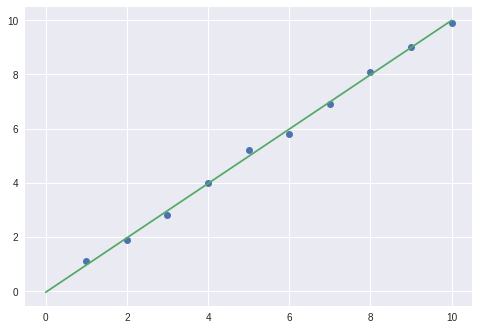

In [33]:
# Supervised Learning - Regression (univariate linear regression)

# 1. Load in a toy dataset
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1.1, 1.9, 2.8, 4, 5.2, 5.8, 6.9, 8.1, 9, 9.9]

# Reshape the dimensions of our data into numpy arrays (transposes the data)
features = np.array(X).reshape(-1, 1)
output = np.array(y).reshape(-1, 1)

# 2. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.33, random_state=42)

# 3. Create a machine learning model
linear_regression_model = linear_model.LinearRegression()

# 4. Train the model
linear_regression_model.fit(X_train, y_train)

# 5. Test performance of the model on unseen testing data
y_pred = linear_regression_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

# 6. Make a prediction with model
prediction = linear_regression_model.predict(4.5)
print("If our input value is 4.5 we predict the output will be {:.4f}:".format(prediction[0][0]))

# 7. Visualize the decision boundary and dataset
x_pred = np.arange(0.0, 11.0)
y_pred = []
for index in range(len(x_pred)):
  y_pred.append(linear_regression_model.predict(x_pred[index])[0][0])
  
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.plot(x_pred, y_pred)
plt.show()

# Multivariate Linear Regression

## Make a Multivariate Regression Model from Scatch

Now just like with univariate linear regression we can perform multivariate linear regression if we have weights and inputs.

$$y = f(x) = WX =\sum_{i=1}^{N}w_i \times x_i =w_nx^n+w_{n-1}x^{n-1}+\ ...+\ w_0$$

$$y = (w_1 \times x_1) + (w_2 \times x_2) +\ ...+\ (w_N \times x_N)$$

**Example:**
$$W = [2, 1, 0],\ X = [1, 2, 3]$$

$$y = (w_1x_1) + (w_2x_2) + (w_3x_3)$$

$$y = (2x_1) + (1x_2) + (0x_3)$$

$$y = (2 \times 1) + (1 \times 2) + (0 \times 3) = 2+2 = 4$$


In [0]:
# Create custom multivariate/polynomial regression function
def reg_output(w,x):
  return np.dot(w,x)

In [35]:
# Define all the weights/slopes and input values to calculate regression output
w = [2,1,0]
x = [1,2,3]
print(reg_output(w,x))

4


## Fitting a Mulitvariate Regression Model

**Update Rule:**

Unlike univariate regression we don't have formulas to find our weights for multivariate regression. To find a solution we'll have to make an initial guess to figure out how much the predicted values differs from the labeled data and iteratively improve the model.

To do so we'll start with a simple update rule where we update the weight based on a learning rate $\alpha$ and a *gradient* $\Delta w$ that indicates in which direction we need to move the weight $w_i$ to reduce the error:

$$w_i \leftarrow w_i -\ \alpha \Delta w$$

Now in order to determine the *gradient* $\Delta w$ we again need to use calculus to find a formula that minimizes our error:

$$w_i \leftarrow w_i -\ \alpha \frac{\delta}{\delta w_i}Loss(W)$$

We choose our error metric $Loss(w)$ as our sum of squared errors:

$$w_i \leftarrow w_i -\ \alpha \frac{\delta}{\delta w_i}(y - \hat{y})^2$$

Which then gets reduced further down to the following update rule:

$$w_i \leftarrow w_i +\ \alpha\ (y - \hat{y})x$$

For multiple examples of x of size N the rule is the following:

$$w_i \leftarrow w_i +\alpha\sum_{i=0}^{N}(y_i - \hat{y})x_i$$


In [0]:
def weight_update_rule(x, y, weights, learning_rate):
  weights += learning_rate*(y - reg_output(weights, x))*x

**Gradient Descent:**

Now that we have an update rule we'll need to iteratively update the weights of our model to better reflect what we see in the data.


$$
\text{loop until converge:}
\\\qquad\text{for point in data:}
\\ \qquad\qquad\qquad\qquad w_i \leftarrow w_i +\ \alpha\ (y - \hat{y})x
$$




In [0]:
def gradient_descent(features, targets, epochs, learning_rate):
  # Initialize small random weights based on number of features
  n_records, n_features = features.shape
  weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
  
  # Train for number of epochs
  for e in range(epochs):
    # Update weights for each data point
    for x, y in zip(features, targets):
      # Update Rule
      weight_update_rule(x, y, weights, learning_rate)
    # Display weight after a number of epochs has been complete
    if e%10 == 0:
      print("Epoch: ", e)
      print("Weights: ", weights)
  return weights

In [38]:
np.random.seed(44)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
y = np.array([1.1, 1.9, 2.8, 4, 5.2, 5.8, 6.9, 8.1, 9, 9.9]).reshape(-1,1)
epochs = 100
learning_rate = 0.001
gradient_descent(x, y, epochs, learning_rate)

Epoch:  0
Weights:  [-0.17691541]
Epoch:  10
Weights:  [0.97351959]
Epoch:  20
Weights:  [0.99493657]
Epoch:  30
Weights:  [0.99533528]
Epoch:  40
Weights:  [0.9953427]
Epoch:  50
Weights:  [0.99534284]
Epoch:  60
Weights:  [0.99534284]
Epoch:  70
Weights:  [0.99534284]
Epoch:  80
Weights:  [0.99534284]
Epoch:  90
Weights:  [0.99534284]


array([0.99534284])

Now let's put all our previous code together to make an improved regression model.

In [0]:
class multivariate_regression_model:
  def __init__(self, lr=0.01, ep=1000):
    self.learning_rate = lr
    self.epochs = ep
    self.weights = None
    
  def train(self, features, targets):
    # Initialize small random weights based on number of features
    n_records, n_features = features.shape
    self.weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
  
    # Train for number of epochs
    for e in range(self.epochs):
      # Update weights for each data point
      for x, y in zip(features, targets):
        # Update Rule
        weight_update_rule(x, y, self.weights, self.learning_rate)
	
  def predict(self, x):
    return reg_output(self.weights, x)

Now that our class is written, let's test it on some small data to see if it works as intended.

In [40]:
# Dataset to train modeld
features = np.array([[1,2],[2,3],[3,5],[2,4],[2,3],[1,6],[1,5],[3,1],[4,2],[2,2]])
# z = 1x + 2y
labels = np.array([5, 8, 15, 10, 8, 13, 11, 5, 8, 6])

# Initialize our model
mult_reg = multivariate_regression_model()

# Train our model with the data
mult_reg.train(features, labels)

# Make a prediction
# z = (1)(3) + (2)(3) = 3 + 6 = 9
print(mult_reg.predict([3,3]))

9.200119084109236


Once again let's turn to sklearns regression module to make predictions but this time instead of making a prediction on a simple line equation we'll make predictions on a quadratic equation.

##Multivariate Linear Regression Demo using Sklearn

Outline of code:
1.   Load the data
2.   Split into training and testing data
3.   Create our linear regression model
4.   Train the model with training data
5.   Test the performance of our trainined model
6.   Display prediction on unseen data point
7.   Visualize the decision boundary


Mean squared error: 282907.35
R2 Score: 0.96
If our input value is 75 we predict the output will be 5746.8272:


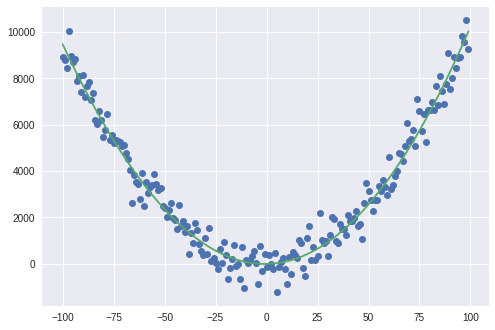

In [41]:
# Supervised Learning - Regression (multivariate polynomial linear regression)

# 1. Load in a toy dataset
X = np.arange(-100,100,1)
sigma = 500
y = X**2 + 3*X + sigma * np.random.randn(200) # y = x^2 + 3x

# Reshape data (transpose data)
features = np.array(X).reshape(-1, 1)
output = np.array(y).reshape(-1, 1)

# 2. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.33, random_state=42)

# 3. Create a machine learning model
regression_model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression(fit_intercept=False))])

# 4. Train the model
regression_model.fit(X_train, y_train)

# 5. See performance of the model on unseen testing data
y_pred = regression_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

# 6. Make a prediction with model
prediction = regression_model.predict(75)
print("If our input value is 75 we predict the output will be {:.4f}:".format(prediction[0][0]))

# 7. Visualize the decision boundary and dataset
x_pred = np.arange(-100.0, 100.0)
y_pred = []
for index in range(len(x_pred)):
  y_pred.append(regression_model.predict(x_pred[index])[0])
  
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.plot(x_pred, y_pred)
plt.show()

Okay now that we showed you a working example of linear regression see if you can make your own:
1.   Load the sklearn iris data
2.   Split the training and testing data
3.   Create a linear regression model
4.   Train the model with the training data
5.   Test the model performance using the training data to make predictions and compare the predictions with the testing labels

In [42]:
# Supervised Learning - Regression (multivariate linear regression)

# 1. Load sklearn iris dataset
dataset = datasets.load_iris()
features = dataset.data
labels = dataset.target

# 2. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# 3. Create a machine learning model
regression_model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression(fit_intercept=False))])

# 4. Train the model
regression_model.fit(X_train, y_train)

# 5. See performance of the model on unseen testing data
y_pred = regression_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.04
R2 Score: 0.94


# Logistic Regression

In the previous examples we showed you how to make predictions on continous vaues using regression but how do we make predictions on classification problems? We'll we can actually tweak our linear regression model a bit so that we can make predictions between 0 - 1. Depending on the value generated we can then classify the example as 0 or 1 (for example an image of a cat might generate the value 0.1 which is close to 0 so if training properly the model will label the image as a cat).

To transform our outputs between zero and one we'll use the logistic regression formula as listed below:

$$z = f(x) = (w_1 \times x_1) + (w_2 \times x_2) +\ ...+\ (w_N \times x_N)$$

$$ y = \frac{1}{1+e^{-z}}$$

**Example:**
$$W = [2, 1, 0],\ X = [1, 2, 3]$$

$$z = (2x_1) + (1x_2) + (0x_3)$$

$$z = (2 \times 1) + (1 \times 2) + (0 \times 3) = 2+2 = 4$$

$$ y = \frac{1}{1+e^{-4}} = 0.982$$

In [0]:
# Build custom logistic regression model to perform classification
def logistic_regression(w,x):
  return 1.0/(1.0 + np.exp(-np.dot(w,x)))

In [44]:
# Define weights and inputs just like with regular regression to get output between 0-1.0
x = [1,2,3]
w = [1,2,3]
print(logistic_regression(w,x))

0.9999991684719722


Now that we seen the code in action let's return back to sklearn to see how we might implement logistic regression on a classification problem.

Outline of code:
1.   Load the data
2.   Split into training and testing data
3.   Create our logistic regression model
4.   Train the model with training data
5.   Test the performance of our trainined model
6.   Display prediction on unseen data point
7.   Visualize the decision boundary


In [45]:
# Supervised Learning - Classification

# 1. Load in a dataset
X = np.array([[1,1],[1,2],[1,3],[1,4],[2,1],[2,2],[2,3],[2,4],[3,1],[3,2],[3,3],[3,4],[4,1],[4,2],[4,3],[4,4]])
y = np.array([0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1])

# 2. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Create a machine learning model
log_reg = linear_model.LogisticRegression()

# 4. Train the model
log_reg.fit(X_train, y_train)

# 5. Test performance of the model on unseen testing data
y_pred = log_reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

# 6. Make predictions with model
predictions = log_reg.predict([[1, 3.5], [3, 1], [4, 2]])
print("If our input values are [[1, 3.5], [3, 1], [4, 2]] predict the outputs will be {}:".format(predictions))


Mean squared error: 0.50
Accuracy: 0.50
If our input values are [[1, 3.5], [3, 1], [4, 2]] predict the outputs will be [1 0 0]:


**Visualize decision boundary**

Helper functions to help generate our decision boundaries

In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

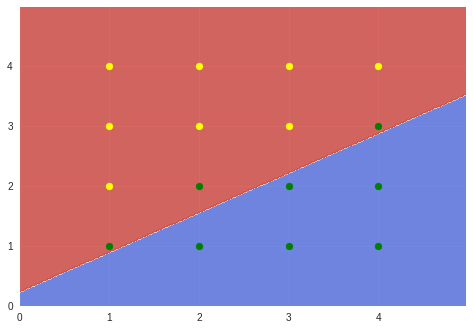

In [47]:
# 7. Visualize decision boundary
# Create figure to hold our plot
fig, sub = plt.subplots()

# Separate labeled data 
ones = np.concatenate([data for data, label in zip(X,y) if label == 1], axis=0)
zeros = np.concatenate([data for data, label in zip(X,y) if label == 0], axis=0)

# Separate labels from features
ones_x = ones[0::2]
ones_y = ones[1::2]
zeros_x = zeros[0::2]
zeros_y = zeros[1::2]
X0, X1 = X[:, 0], X[:, 1]

# Create mesh points 
xx, yy = make_meshgrid(X0, X1)

# For each point predict label and generate contour plot
plot_contours(sub, log_reg, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Generate scatter plots for labeled training data to see how well model performs visually
plt.scatter(ones_x, ones_y, c='yellow')
plt.scatter(zeros_x, zeros_y, c='green')

# Display Graph
plt.show()

Okay now try to implement your own logistic regression:
1.   Load the sklearn breast cancer data
2.   Split the training and testing data
3.   Create a logistic regression model
4.   Train the model with the training data
5.   Test the model performance using the training data to make predictions and compare the predictions with the testing labels

In [48]:
# Supervised Learning - Classification

# 1. Load sklearn breast cancer dataset
dataset = datasets.load_breast_cancer()
features = dataset.data
labels = dataset.target

# 2. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# 3. Create a machine learning model
log_reg = linear_model.LogisticRegression()

# 4. Train the model
log_reg.fit(X_train, y_train)

# 5. Test performance of the model on unseen testing data
y_pred = log_reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Mean squared error: 0.04
Accuracy: 0.96
